## Visualizations
We made some visuals in tableau showing sqft_living and grade compared with price.

# Housing Data Analysis

## Overview
We looked at housing data taken from King County, WA and made a linear regression model to predict the price of a house described by given inputs. Our analysis of the data and our intermediate models determined that sqft_living and grade were the most important features for predicting the price of a house.

## Business Understanding
We were tasked with creating a tool that will allow our client to input information about a house and get back a predicted price. They were interested in average homes, so the predictive model should be made with that in mind.

## Data Exploration and Cleaning

In [1]:
# Import relevant functions and libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
def evaluate_model(X_tr, X_te, y_tr, y_te, log=False):
    '''
    Initial function written by Lindsey Berlin, edited by David Cruz
    
    Takes in training and testing data from a train_test_split function.
    Prints an evaluation of r-square value with mean absolute error and mean squared error.
    Visualizes residuals with y-values.
    Returns training predictions, test predictions, and coefficients.
    log: Boolean value, if the training data is logarithmically scaled set to true and the function will undo that scaling.
    '''
    # Fit model
    lr = LinearRegression()
    lr.fit(X_tr, y_tr)
    tr_preds = lr.predict(X_tr) 
    te_preds = lr.predict(X_te)
    
    print('\n')
    
    #Evaluate
    print(f"Train R2 Score: {r2_score(y_tr, tr_preds):.4f}")
    if log == True:
        y_tr_unlog = np.expm1(y_tr)
        tr_preds_unlog = np.expm1(tr_preds)      
        print(f"Train MAE Score: ${mean_absolute_error(y_tr_unlog, tr_preds_unlog):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_tr_unlog, tr_preds_unlog, squared=False):.4f}")
    else:
        print(f"Train MAE Score: ${mean_absolute_error(y_tr, tr_preds):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_tr, tr_preds, squared=False):.4f}")
    print("*"*20)
    print(f"Test R2 Score: {r2_score(y_te, te_preds):.4f}")
    if log == True:
        y_te_unlog = np.expm1(y_te)
        te_preds_unlog = np.expm1(te_preds)
        print(f"Test MAE Score: ${mean_absolute_error(y_te_unlog, te_preds_unlog):.4f}")
        print(f"Test RMSE Score: ${mean_squared_error(y_te_unlog, te_preds_unlog, squared=False):.4f}")          
    else:
        print(f"Test MAE Score: ${mean_absolute_error(y_te, te_preds):.4f}")
        print(f"Test RMSE Score: ${mean_squared_error(y_te, te_preds, squared=False):.4f}")  
    print("*"*20)
    
    #Visualize
    plt.scatter(tr_preds, y_tr-tr_preds, label='Train')
    plt.scatter(te_preds, y_te-te_preds, label='Test')
    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()
    
    return tr_preds, te_preds, lr.coef_

In [3]:
# Read in and view data
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We see null values in a few columns, so let's take a closer look at those.

In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [7]:
df[df['waterfront'].isna() == True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,NONE,...,8 Good,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,NONE,...,7 Average,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386
40,5547700270,7/15/2014,625000.0,4,2.50,2570,5520,2.0,NaN,NONE,...,9 Better,2570,0.0,2000,NaN,98074,47.6145,-122.027,2470,5669
55,9822700295,5/12/2014,885000.0,4,2.50,2830,5000,2.0,NaN,NONE,...,9 Better,2830,0.0,1995,0.0,98105,47.6597,-122.290,1950,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,5087900040,10/17/2014,350000.0,4,2.75,2500,5995,2.0,NaN,NONE,...,8 Good,2500,0.0,2008,0.0,98042,47.3749,-122.107,2530,5988
21582,8956200760,10/13/2014,541800.0,4,2.50,3118,7866,2.0,NaN,AVERAGE,...,9 Better,3118,0.0,2014,0.0,98001,47.2931,-122.264,2673,6500
21586,844000965,6/26/2014,224000.0,3,1.75,1500,11968,1.0,NaN,NONE,...,6 Low Average,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,NONE,...,8 Good,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731


In [8]:
df[df['waterfront'] == 'YES'].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,146.00000,146.00000,146.00000,146.00000,146.00000,146.00000,146.00000,146.00000,146.00000,121.00000,146.00000,146.00000,146.00000,146.00000,146.00000
mean,4454968693.04795,1717214.72603,3.34932,2.70890,3244.75342,25870.88356,1.63014,2508.76027,1962.28082,476.62810,98096.71233,47.53968,-122.27816,2682.82877,22893.69863
std,2858044756.51004,1145384.85666,1.09917,1.12151,1652.13496,44629.07590,0.54790,1283.72049,27.11858,852.48473,60.59976,0.11374,0.12377,808.41045,23264.08599
min,121029034.00000,285000.00000,1.00000,0.75000,440.00000,1989.00000,1.00000,440.00000,1905.00000,0.00000,98004.00000,47.32760,-122.51400,750.00000,3230.00000
25%,2016368797.00000,827500.00000,3.00000,1.81250,2082.50000,11692.25000,1.00000,1565.00000,1941.25000,0.00000,98040.00000,47.45255,-122.37600,2075.00000,11991.50000
50%,3692779634.00000,1510000.00000,3.00000,2.50000,2900.00000,17730.50000,2.00000,2200.00000,1959.50000,0.00000,98075.00000,47.54815,-122.27350,2695.00000,16260.50000
75%,7390450150.00000,2282500.00000,4.00000,3.25000,4117.50000,26692.50000,2.00000,3220.00000,1984.75000,0.00000,98155.00000,47.60755,-122.21000,3140.00000,24537.50000
max,9808700762.00000,7060000.00000,6.00000,6.75000,10040.00000,505166.00000,3.00000,7680.00000,2014.00000,2009.00000,98199.00000,47.77290,-122.05900,4913.00000,192268.00000


In [9]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,17755.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000
mean,4580474287.77099,540296.57351,3.37320,2.11583,2080.32185,15099.40876,1.49410,1788.59684,1970.99968,83.63678,98077.95185,47.56009,-122.21398,1986.62032,12758.28351
std,2876735715.74778,367368.14010,0.92630,0.76898,918.10613,41412.63688,0.53968,827.75976,29.37523,399.94641,53.51307,0.13855,0.14072,685.23047,27274.44195
min,1000102.00000,78000.00000,1.00000,0.50000,370.00000,520.00000,1.00000,370.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049175.00000,322000.00000,3.00000,1.75000,1430.00000,5040.00000,1.00000,1190.00000,1951.00000,0.00000,98033.00000,47.47110,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,1560.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23100,1840.00000,7620.00000
75%,7308900490.00000,645000.00000,4.00000,2.50000,2550.00000,10685.00000,2.00000,2210.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,9410.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


The mean of the price of houses at a waterfront is double that of the mean of the entire dataframe, and seeing how few values in waterfront are yes, that column is not useful data.

In [10]:
df['view'].isna().sum()

63

In [11]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

View has a similar problem to waterfront where such a large portion of the data has 'NONE' and there are null values scattered throughout, so that column won't be of much use.

In [12]:
df = df.drop(columns=['waterfront','view'])

In [13]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [14]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1960.0        1
946.0         1
3260.0        1
1281.0        1
2250.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [15]:
df[df['sqft_basement'] == '?'].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,454.00,454.00,454.00,454.00,454.00,454.00,454.00,454.00,454.00,366.00,454.00,454.00,454.00,454.00,454.00
mean,4555793697.02,530323.32,3.40,2.10,2052.43,15670.87,1.52,1766.61,1969.90,114.27,98081.81,47.55,-122.22,1956.30,13659.03
std,2898736355.53,333003.05,0.99,0.79,897.86,50029.20,0.56,797.47,31.77,463.83,52.36,0.14,0.15,664.45,31810.91
min,11200400.00,102500.00,1.00,0.50,600.00,681.00,1.00,600.00,1900.00,0.00,98001.00,47.19,-122.46,740.00,977.00
25%,2066505312.50,320750.00,3.00,1.50,1430.00,5000.00,1.00,1162.50,1944.25,0.00,98033.25,47.46,-122.33,1490.00,5000.00
50%,3883401682.50,457000.00,3.00,2.25,1900.00,7200.00,1.50,1595.00,1975.00,0.00,98074.00,47.56,-122.27,1800.00,7211.00
75%,7235075825.00,649500.00,4.00,2.50,2510.00,10481.00,2.00,2180.00,1999.00,0.00,98118.75,47.67,-122.13,2337.50,9902.25
max,9834200305.00,3420000.00,7.00,5.50,6930.00,881654.00,3.00,5450.00,2015.00,2014.00,98199.00,47.77,-121.36,4560.00,438213.00


The sqft_basement column has question marks throughout it, but 454 is such a small percent of the data that we decided to simply drop the rows where the value is a question mark.

In [16]:
df = df[df['sqft_basement'] != '?']
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Now that the question marks are gone, we can turn sqft_basement into a float so that models can use it.

In [17]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   condition      21143 non-null  object 
 9   grade          21143 non-null  object 
 10  sqft_above     21143 non-null  int64  
 11  sqft_basement  21143 non-null  float64
 12  yr_built       21143 non-null  int64  
 13  yr_renovated   17389 non-null  float64
 14  zipcode        21143 non-null  int64  
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

In [19]:
df['yr_renovated'].isna().sum()

3754

In [20]:
df['yr_renovated'].value_counts()

0.0       16666
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64

A 0 in year renovated likely implies that the home hasn't been renovated, but we decided that dropping the column was simpler than adding a column indicated a home that has not been renovated, and doesn't hinder our model much.

In [21]:
df = df.drop(columns='yr_renovated')

In [22]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,Average,8 Good,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,Average,8 Good,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,Average,7 Average,1020,0.0,2009,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,Average,8 Good,1600,0.0,2004,98027,47.5345,-122.069,1410,1287


In [23]:
df['id'].value_counts()

795000620     3
9238500040    2
8062900070    2
8161020060    2
5430300171    2
             ..
3021059276    1
880000205     1
8165500110    1
9492500170    1
1777500160    1
Name: id, Length: 20970, dtype: int64

Some houses have been sold more than once. Should drop the duplicates and keep only the most recent price. First step is to turn the date column into a datetime object.

In [24]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21143 non-null  int64         
 1   date           21143 non-null  datetime64[ns]
 2   price          21143 non-null  float64       
 3   bedrooms       21143 non-null  int64         
 4   bathrooms      21143 non-null  float64       
 5   sqft_living    21143 non-null  int64         
 6   sqft_lot       21143 non-null  int64         
 7   floors         21143 non-null  float64       
 8   condition      21143 non-null  object        
 9   grade          21143 non-null  object        
 10  sqft_above     21143 non-null  int64         
 11  sqft_basement  21143 non-null  float64       
 12  yr_built       21143 non-null  int64         
 13  zipcode        21143 non-null  int64         
 14  lat            21143 non-null  float64       
 15  long           2114

In [26]:
df = df.sort_values(by=["id", "date"],axis=0,ascending=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
2494,1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,Average,7 Average,2400,0.0,1991,98002,47.3262,-122.214,2060,7316
2495,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,Average,7 Average,2400,0.0,1991,98002,47.3262,-122.214,2060,7316
6729,1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,Good,8 Good,1160,900.0,1947,98166,47.4444,-122.351,2590,21891
8404,1200021,2014-08-11,400000.0,3,1.00,1460,43000,1.0,Average,7 Average,1460,0.0,1952,98166,47.4434,-122.347,2250,20023
8800,2800031,2015-04-01,235000.0,3,1.00,1430,7599,1.5,Good,6 Low Average,1010,420.0,1930,98168,47.4783,-122.265,1290,10320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,9842300095,2014-07-25,365000.0,5,2.00,1600,4168,1.5,Average,7 Average,1600,0.0,1927,98126,47.5297,-122.381,1190,4168
3257,9842300485,2015-03-11,380000.0,2,1.00,1040,7372,1.0,Very Good,7 Average,840,200.0,1939,98126,47.5285,-122.378,1930,5150
7614,9842300540,2014-06-24,339000.0,3,1.00,1100,4128,1.0,Good,7 Average,720,380.0,1942,98126,47.5296,-122.379,1510,4538
20963,9895000040,2014-07-03,399900.0,2,1.75,1410,1005,1.5,Average,9 Better,900,510.0,2011,98027,47.5446,-122.018,1440,1188


In [27]:
df = df.drop_duplicates(subset='id',keep='last')
df['id'].value_counts()

2911700010    1
643300010     1
7660100238    1
3028200080    1
8964800050    1
             ..
7589200165    1
421000500     1
1402660150    1
2726079061    1
1777500160    1
Name: id, Length: 20970, dtype: int64

In [28]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,Average,7 Average,2400,0.0,1991,98002,47.3262,-122.214,2060,7316
6729,1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,Good,8 Good,1160,900.0,1947,98166,47.4444,-122.351,2590,21891
8404,1200021,2014-08-11,400000.0,3,1.00,1460,43000,1.0,Average,7 Average,1460,0.0,1952,98166,47.4434,-122.347,2250,20023
8800,2800031,2015-04-01,235000.0,3,1.00,1430,7599,1.5,Good,6 Low Average,1010,420.0,1930,98168,47.4783,-122.265,1290,10320
3553,3600057,2015-03-19,402500.0,4,2.00,1650,3504,1.0,Average,7 Average,760,890.0,1951,98144,47.5803,-122.294,1480,3504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,9842300095,2014-07-25,365000.0,5,2.00,1600,4168,1.5,Average,7 Average,1600,0.0,1927,98126,47.5297,-122.381,1190,4168
3257,9842300485,2015-03-11,380000.0,2,1.00,1040,7372,1.0,Very Good,7 Average,840,200.0,1939,98126,47.5285,-122.378,1930,5150
7614,9842300540,2014-06-24,339000.0,3,1.00,1100,4128,1.0,Good,7 Average,720,380.0,1942,98126,47.5296,-122.379,1510,4538
20963,9895000040,2014-07-03,399900.0,2,1.75,1410,1005,1.5,Average,9 Better,900,510.0,2011,98027,47.5446,-122.018,1440,1188


Data no longer has duplicate ids, and kept the most recent of the sales.

## Data Exploration

We've done some initial data cleaning, now to start exploring it properly. A pairplot will show a lot of information, but we only need to look for linear relationships to price.

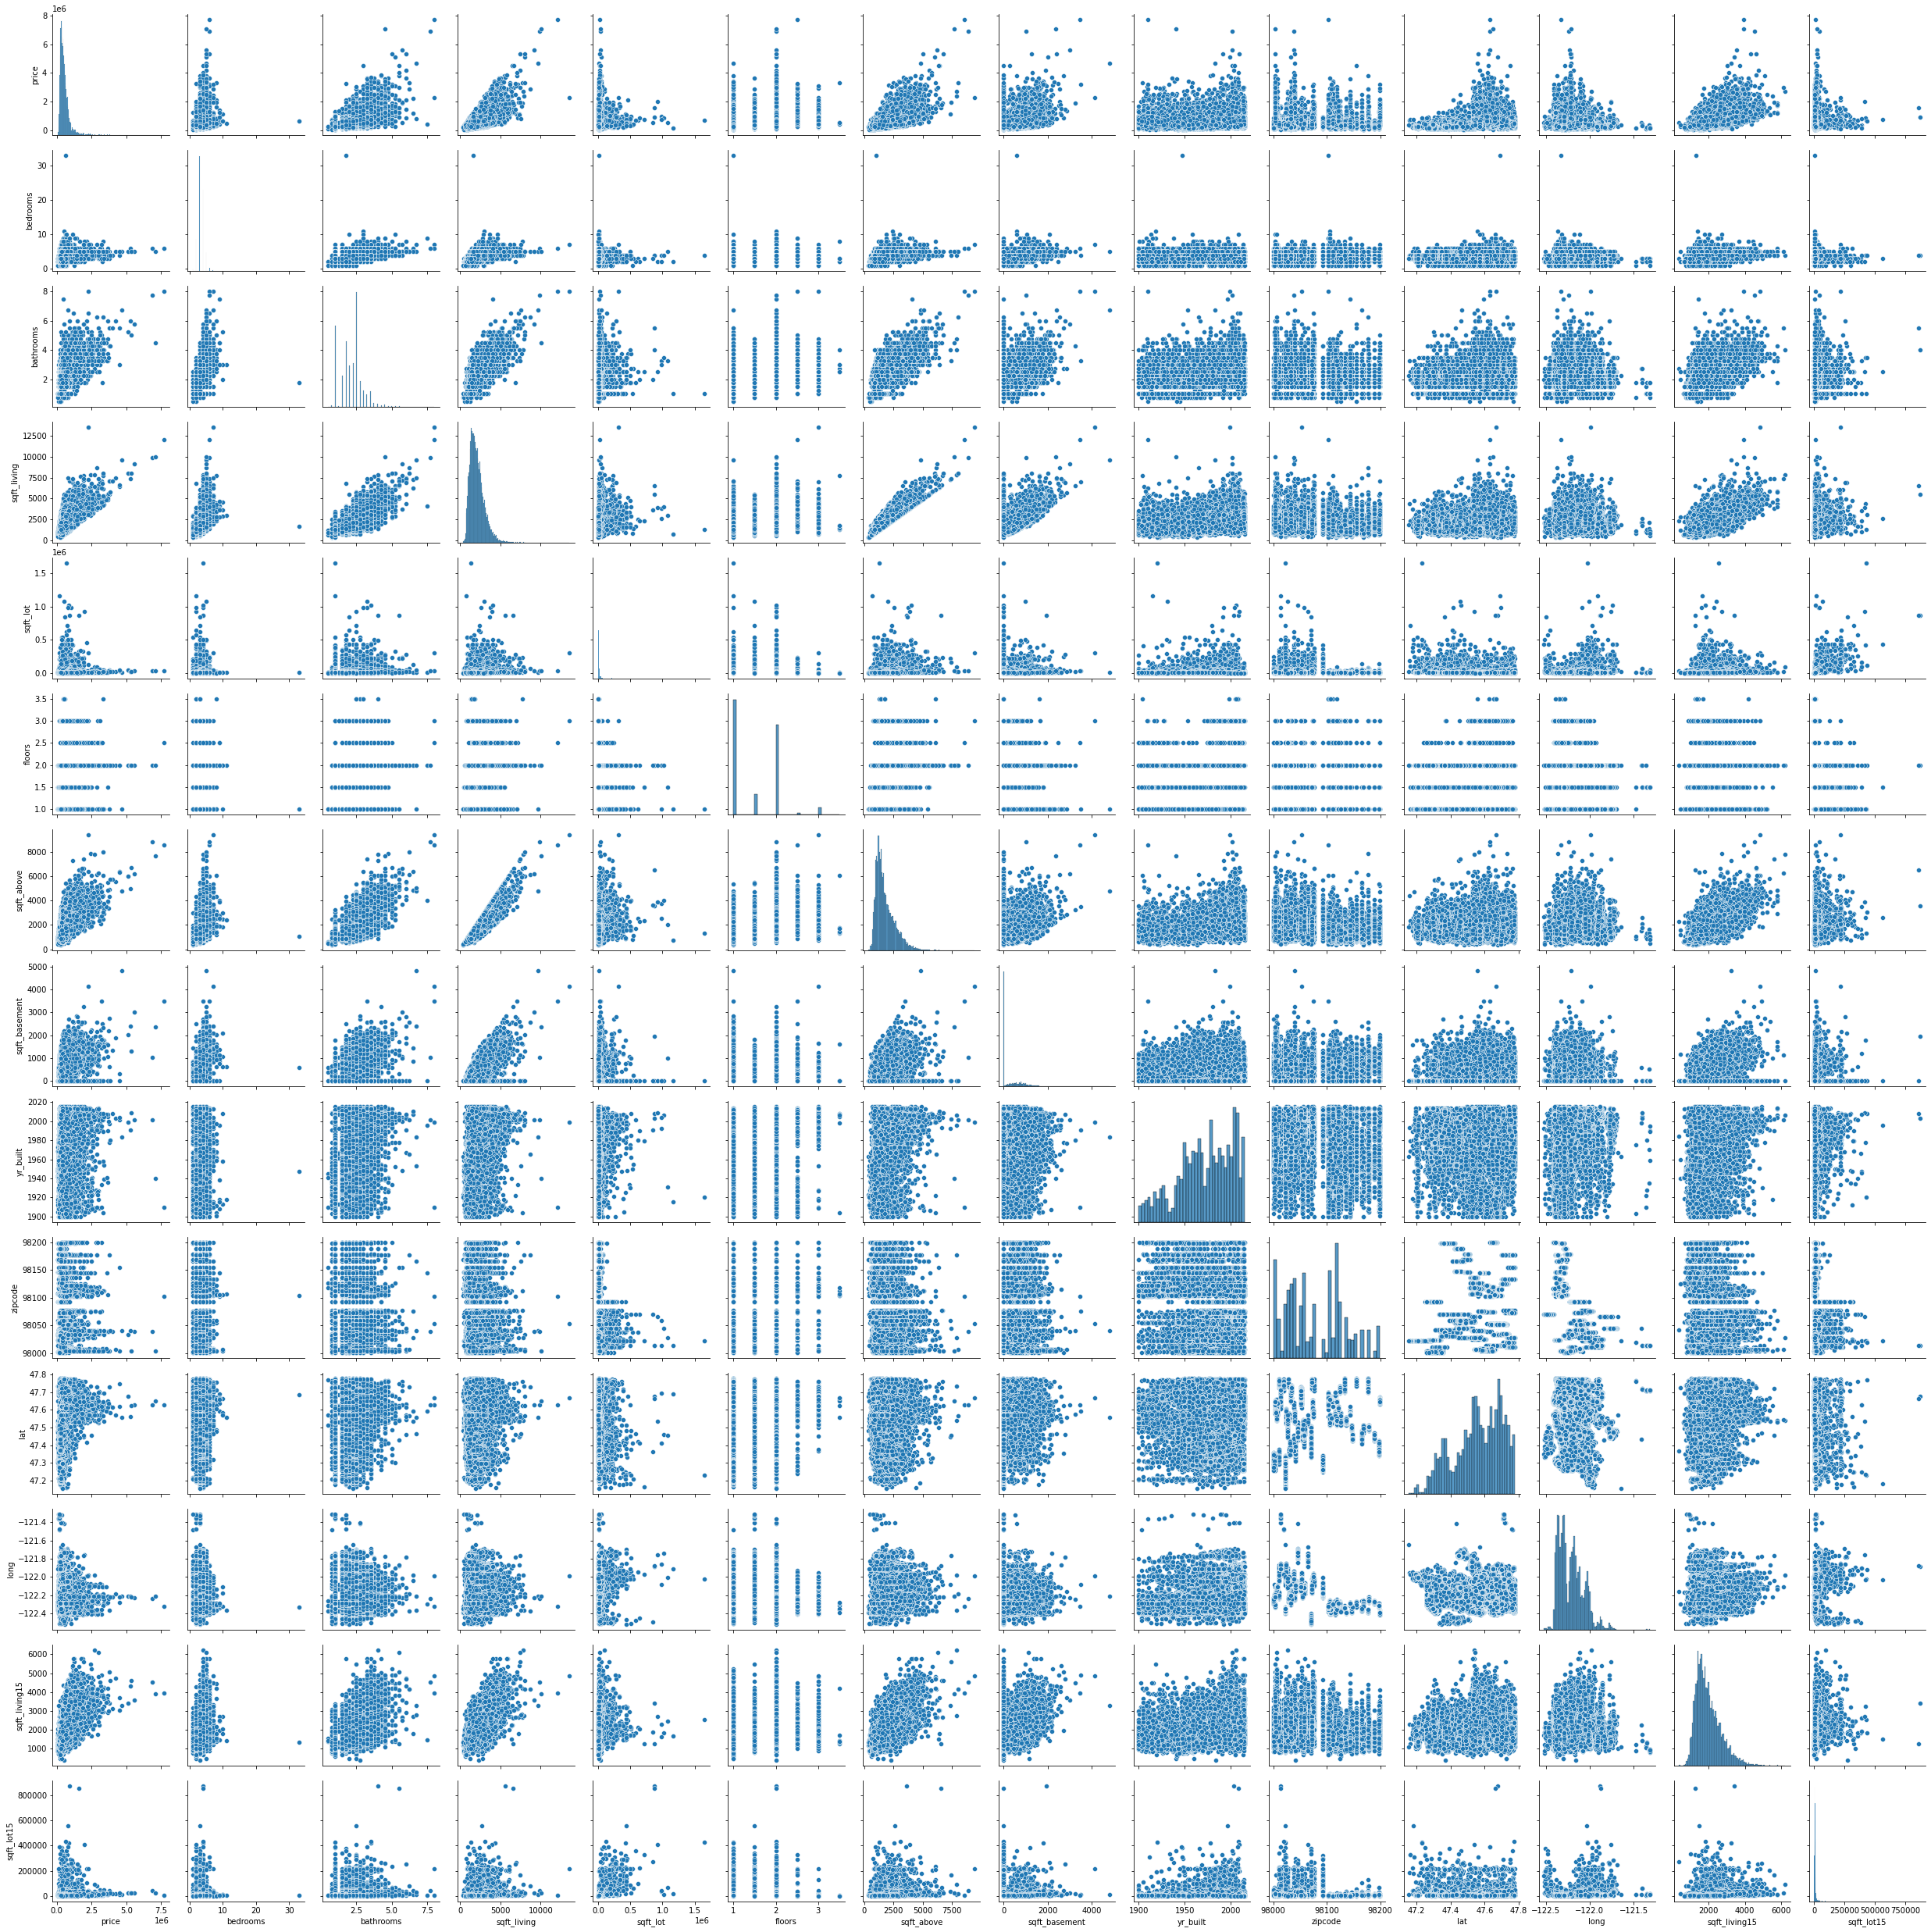

In [29]:
sns.pairplot(data=df.drop(columns=['id','date']));

Looks like most of the sqft metrics have fairly linear relationships with price, so let's look at those correlations.

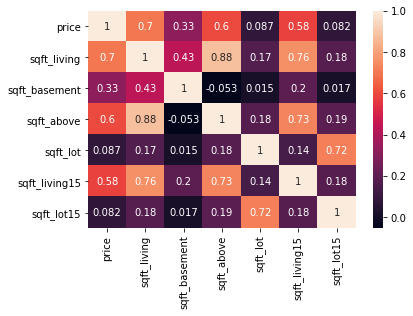

In [30]:
sns.heatmap(data=df[['price','sqft_living','sqft_basement','sqft_above','sqft_lot','sqft_living15','sqft_lot15']].corr(),
            annot=True);

Looks like sqft_living has the highest correlation to price, and has high colinearity with sqft_above, likely because sqft_above is similar to sqft_living in houses without basements.

## Simple Model
Since sqft_living has a high correlation to price, let's run a simple model using only sqft_living to predict price. Let's start with a train test split so we can check our model after teaching it.

In [31]:
simple_x = df[['sqft_living']]
y = df['price']
simple_x_train, simple_x_test, simple_y_train, simple_y_test = train_test_split(simple_x, y,
                                                                                test_size=0.25, random_state = 23)

With the data split, we can make a simple linear regression model.



Train R2 Score: 0.4894
Train MAE Score: $172295.7080
Train RMSE Score: $260986.3265
********************
Test R2 Score: 0.5000
Test MAE Score: $177570.4678
Test RMSE Score: $266598.8782
********************


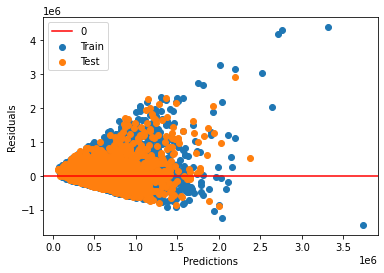

(array([478702.97189845, 517692.90052677, 590102.76797936, ...,
        464777.99738834, 941012.12563422, 517692.90052677]),
 array([649980.15837285, 935442.13583018, 698717.56915825, ...,
        565037.81386116, 718212.53347241, 269828.35424675]),
 array([278.4994902]))

In [32]:
evaluate_model(simple_x_train,simple_x_test,simple_y_train,simple_y_test)

This model accounts for about 48% of variance in price, which is not bad for a simple baseline model. The residuals show that the model is much more accurate on cheaper houses than expensive ones, which is not ideal. Next let's try throwing everything into a model and see how that performs.

In [33]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,Average,7 Average,2400,0.0,1991,98002,47.3262,-122.214,2060,7316
6729,1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,Good,8 Good,1160,900.0,1947,98166,47.4444,-122.351,2590,21891
8404,1200021,2014-08-11,400000.0,3,1.00,1460,43000,1.0,Average,7 Average,1460,0.0,1952,98166,47.4434,-122.347,2250,20023
8800,2800031,2015-04-01,235000.0,3,1.00,1430,7599,1.5,Good,6 Low Average,1010,420.0,1930,98168,47.4783,-122.265,1290,10320
3553,3600057,2015-03-19,402500.0,4,2.00,1650,3504,1.0,Average,7 Average,760,890.0,1951,98144,47.5803,-122.294,1480,3504


In [34]:
sink_x = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above',
             'sqft_basement','yr_built','zipcode','lat','long','sqft_living15','sqft_lot15']]
sink_x_train, sink_x_test, sink_y_train, sink_y_test = train_test_split(sink_x, y,
                                                                                test_size=0.25, random_state = 23)

To throw everything in, we'll need to encode our categorical values and scale the data. Let's one hot encode grade and condition.

In [35]:
cat_cols = ['grade','condition']
encoder = OneHotEncoder(handle_unknown='error',drop='first',categories='auto')
ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],remainder='passthrough',sparse_threshold=0)
ct.fit(sink_x_train)
sink_x_train = ct.transform(sink_x_train)
sink_x_test = ct.transform(sink_x_test)



Train R2 Score: 0.6953
Train MAE Score: $123820.3788
Train RMSE Score: $201612.6370
********************
Test R2 Score: 0.6663
Test MAE Score: $129488.6557
Test RMSE Score: $217792.4422
********************


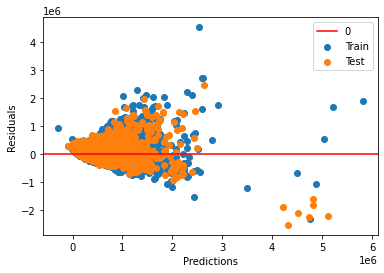

(array([503441.42913058, 622118.54590162, 665182.59801053, ...,
        330872.43586949, 830558.63385056, 431697.30400362]),
 array([345897.54574234, 969518.28235416, 893667.61333766, ...,
        358912.01414318, 728647.64874805, 189415.5149627 ]),
 array([ 2.54872390e+05,  7.78397883e+05,  3.00871751e+06, -2.66691949e+05,
        -4.08594591e+05, -4.20738220e+05, -3.94427449e+05, -3.55888151e+05,
        -2.92495328e+05, -1.70156772e+05, -2.05561236e+04,  2.72338644e+04,
        -3.31275749e+04,  6.95909549e+04, -2.84314393e+04,  4.91421213e+04,
         9.65814062e+01,  6.71435347e-02,  3.17274151e+04,  3.78128878e+01,
         5.87686230e+01, -2.60229816e+03, -5.14920736e+02,  5.69309407e+05,
        -2.32262963e+05,  4.85456770e+01, -2.57074158e-01]))

In [36]:
evaluate_model(sink_x_train,sink_x_test,sink_y_train,sink_y_test)

This model accounts for about 66% of variance in the price, which is significantly better than our original model, but it still has the issue of using unnecessary data. We're only interested in average homes, so now let's further filter our original data to narrow what our model is being trained on.

## Data Filtering

In [37]:
df['grade'].value_counts()

7 Average        8706
8 Good           5909
9 Better         2548
6 Low Average    1955
10 Very Good     1108
11 Excellent      388
5 Fair            227
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [38]:
df[df['grade'] == '11 Excellent'].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00
mean,4161939194.66,1496943.71,4.16,3.50,4392.23,36177.96,1.96,3852.94,539.29,1992.05,98055.75,47.60,-122.15,3529.00,27559.44
std,2808416407.67,703202.20,0.80,0.80,985.55,80059.20,0.37,912.97,713.10,20.01,44.47,0.09,0.12,764.24,68260.87
min,46100504.00,420000.00,2.00,1.25,2370.00,609.00,1.00,1910.00,0.00,1906.00,98003.00,47.29,-122.42,1280.00,1229.00
25%,1732801057.50,1040000.00,4.00,3.00,3740.00,10791.50,2.00,3270.00,0.00,1989.00,98027.00,47.55,-122.22,3077.50,10209.00
50%,3620050104.00,1280000.00,4.00,3.50,4265.00,15477.50,2.00,3820.00,0.00,1997.00,98052.00,47.60,-122.15,3555.00,14280.00
75%,6868125098.75,1700000.00,5.00,4.00,4960.00,26224.75,2.00,4352.50,1070.00,2003.00,98075.00,47.65,-122.07,4010.00,21543.50
max,9829201020.00,7060000.00,9.00,6.75,10040.00,871200.00,3.00,8020.00,3260.00,2015.00,98199.00,47.77,-121.78,5790.00,871200.00


In [39]:
df[df['grade'] == '12 Luxury'].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00
mean,3903281109.81,2213806.82,4.27,4.03,5489.47,55253.03,1.96,4674.97,814.50,1992.38,98045.70,47.60,-122.14,3954.81,39406.32
std,2581325853.21,1029064.13,0.91,1.09,1541.83,110223.53,0.44,1258.40,1047.82,21.23,48.78,0.08,0.13,889.09,60260.36
min,98000150.00,835000.00,2.00,2.50,3690.00,3452.00,1.00,2090.00,0.00,1902.00,98004.00,47.31,-122.38,1490.00,2199.00
25%,1924809197.75,1515000.00,4.00,3.25,4452.50,16452.00,2.00,3895.00,0.00,1990.75,98006.00,47.55,-122.22,3285.00,14484.75
50%,3732720177.50,1820000.00,4.00,3.75,5005.00,25870.50,2.00,4535.00,145.00,1998.00,98033.00,47.59,-122.15,4070.00,20676.00
75%,4604350823.75,2707500.00,5.00,4.50,6387.50,40274.25,2.00,5348.25,1375.00,2003.25,98072.50,47.64,-122.10,4642.50,35531.75
max,9831200159.00,5350000.00,8.00,8.00,13540.00,920423.00,3.50,9410.00,4820.00,2010.00,98177.00,47.76,-121.76,6210.00,411962.00


In [40]:
df[df['grade'] == '13 Mansion'].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00
mean,4125711645.08,3710769.23,4.85,5.10,7483.08,28204.77,1.96,6060.77,1422.31,1976.62,98086.15,47.63,-122.26,4005.38,25529.46
std,3079420937.23,1859545.02,0.90,1.62,2097.69,15063.53,0.48,1519.37,1204.67,33.49,73.94,0.07,0.10,1210.78,21375.74
min,853200010.00,1780000.00,3.00,2.50,4500.00,7500.00,1.00,4320.00,0.00,1910.00,98004.00,47.53,-122.41,2200.00,6477.00
25%,2303900035.00,2420000.00,4.00,4.00,6330.00,18200.00,2.00,4900.00,600.00,1965.00,98033.00,47.62,-122.36,3130.00,9196.00
50%,2470100110.00,2980000.00,5.00,5.00,7100.00,27600.00,2.00,6110.00,1110.00,1996.00,98059.00,47.63,-122.24,3940.00,20570.00
75%,6762700020.00,3800000.00,5.00,5.75,8670.00,35069.00,2.00,6290.00,2550.00,2001.00,98177.00,47.65,-122.20,4760.00,35200.00
max,9831200500.00,7700000.00,6.00,8.00,12050.00,64033.00,2.50,8860.00,3480.00,2004.00,98199.00,47.73,-122.11,6110.00,81021.00


The grades of 11 and higher don't have much data, and have means much higher than that of the entire dataframe.Since we only want to look at houses the average buyer would be interested in, we can remove those highly graded homes.

In [41]:
df[df['grade'] == '3 Poor'].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
mean,2420069251.00,262000.00,1.00,0.75,520.00,12981.00,1.00,520.00,0.00,1920.00,98022.00,47.21,-122.00,1340.00,12233.00
std,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
min,2420069251.00,262000.00,1.00,0.75,520.00,12981.00,1.00,520.00,0.00,1920.00,98022.00,47.21,-122.00,1340.00,12233.00
25%,2420069251.00,262000.00,1.00,0.75,520.00,12981.00,1.00,520.00,0.00,1920.00,98022.00,47.21,-122.00,1340.00,12233.00
50%,2420069251.00,262000.00,1.00,0.75,520.00,12981.00,1.00,520.00,0.00,1920.00,98022.00,47.21,-122.00,1340.00,12233.00
75%,2420069251.00,262000.00,1.00,0.75,520.00,12981.00,1.00,520.00,0.00,1920.00,98022.00,47.21,-122.00,1340.00,12233.00
max,2420069251.00,262000.00,1.00,0.75,520.00,12981.00,1.00,520.00,0.00,1920.00,98022.00,47.21,-122.00,1340.00,12233.00


In [42]:
df[df['grade'] == '4 Low'].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,4344408728.22,212001.85,1.59,0.91,680.74,15614.78,1.04,673.33,7.41,1936.26,98068.63,47.50,-122.17,1486.67,12896.63
std,2311528233.88,97294.50,0.57,0.21,224.72,15212.22,0.13,225.64,38.49,15.87,55.32,0.11,0.17,513.07,10545.14
min,745000005.00,80000.00,1.00,0.75,410.00,1500.00,1.00,410.00,0.00,1900.00,98010.00,47.30,-122.39,850.00,4120.00
25%,2234500478.00,142500.00,1.00,0.75,525.00,5145.00,1.00,525.00,0.00,1925.00,98027.00,47.42,-122.33,1150.00,6480.00
50%,3760500240.00,200000.00,2.00,1.00,700.00,8636.00,1.00,660.00,0.00,1942.00,98055.00,47.50,-122.20,1420.00,8990.00
75%,6378350225.00,273500.00,2.00,1.00,765.00,18342.00,1.00,765.00,0.00,1947.50,98106.00,47.54,-122.06,1645.00,14375.50
max,8658300340.00,435000.00,3.00,1.75,1470.00,55764.00,1.50,1470.00,200.00,1967.00,98198.00,47.70,-121.85,3020.00,43301.00


In [43]:
df[df['grade'] == '5 Fair'].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00
mean,3923919902.28,252092.07,2.39,1.10,982.93,24135.09,1.09,941.65,41.28,1935.00,98081.48,47.50,-122.20,1380.61,16235.84
std,2909934261.31,117986.89,1.00,0.32,358.37,90094.42,0.20,339.67,155.07,19.23,56.87,0.13,0.20,382.70,36380.82
min,6200017.00,78000.00,1.00,0.50,370.00,1801.00,1.00,370.00,0.00,1900.00,98001.00,47.20,-122.51,700.00,1260.00
25%,1411674537.00,178250.00,2.00,1.00,715.00,5216.50,1.00,700.00,0.00,1920.00,98036.00,47.45,-122.33,1105.00,5683.50
50%,3124089086.00,230000.00,2.00,1.00,910.00,7137.00,1.00,860.00,0.00,1939.00,98058.00,47.50,-122.23,1340.00,7405.00
75%,7225750500.00,299000.00,3.00,1.00,1170.00,12466.50,1.00,1085.00,0.00,1947.00,98125.50,47.55,-122.17,1580.00,11487.50
max,9435300030.00,795000.00,6.00,2.50,2040.00,1164794.00,2.00,2040.00,850.00,2006.00,98199.00,47.77,-121.31,2961.00,392040.00


In [44]:
df[df['grade'] == '6 Low Average'].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,1955.00,1955.00,1955.00,1955.00,1955.00,1955.00,1955.00,1955.00,1955.00,1955.00,1955.00,1955.00,1955.00,1955.00,1955.00
mean,4447365259.98,304794.27,2.68,1.24,1192.85,12739.45,1.11,1068.49,124.36,1942.48,98102.29,47.53,-122.26,1390.18,11010.47
std,2791748205.68,123144.75,0.83,0.43,397.60,45654.04,0.25,320.78,266.75,21.04,55.02,0.13,0.13,363.98,25085.05
min,2800031.00,84000.00,1.00,0.50,390.00,835.00,1.00,390.00,0.00,1900.00,98001.00,47.19,-122.51,620.00,1198.00
25%,2113700352.50,218000.00,2.00,1.00,900.00,5150.00,1.00,840.00,0.00,1926.00,98055.00,47.47,-122.35,1140.00,5192.00
50%,3821200050.00,280000.00,3.00,1.00,1120.00,7156.00,1.00,1010.00,0.00,1944.00,98117.00,47.53,-122.30,1320.00,7200.00
75%,7278700367.50,370000.00,3.00,1.50,1400.00,9198.50,1.00,1220.00,0.00,1954.00,98146.00,47.65,-122.22,1560.00,8883.00
max,9900000190.00,1200000.00,7.00,3.75,3900.00,1651359.00,2.50,3460.00,1340.00,2015.00,98199.00,47.78,-121.31,3130.00,425581.00


The grades below 6 are low quality homes and have prices significantly lower than the average of our entire dataset. These homes are lower quality than the average buyer would be interested in, so we only need to look at grades from 6 to 10, to give a wide range that still falls within what the average buyer would be interested in.

In [45]:
rel_grade = ['7 Average', '8 Good', '9 Better', '6 Low Average', '10 Very Good']
mask = df['grade'].isin(rel_grade)
df = df[mask]
df['grade'].value_counts()

7 Average        8706
8 Good           5909
9 Better         2548
6 Low Average    1955
10 Very Good     1108
Name: grade, dtype: int64

Data now only includes homes grades 6 through 10.

In [46]:
df['bedrooms'].value_counts()

3     9422
4     6404
2     2545
5     1431
6      234
1      137
7       31
8       12
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

There are a few houses with large numbers of bedrooms that we do not need to look at to account for the average buyer, so to cut out a small, irrelevant chunk of data, we can filter to only include homes with 6 or fewer bedrooms.

In [47]:
df = df[df['bedrooms'] < 7]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,Average,7 Average,2400,0.0,1991,98002,47.3262,-122.214,2060,7316
6729,1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,Good,8 Good,1160,900.0,1947,98166,47.4444,-122.351,2590,21891
8404,1200021,2014-08-11,400000.0,3,1.00,1460,43000,1.0,Average,7 Average,1460,0.0,1952,98166,47.4434,-122.347,2250,20023
8800,2800031,2015-04-01,235000.0,3,1.00,1430,7599,1.5,Good,6 Low Average,1010,420.0,1930,98168,47.4783,-122.265,1290,10320
3553,3600057,2015-03-19,402500.0,4,2.00,1650,3504,1.0,Average,7 Average,760,890.0,1951,98144,47.5803,-122.294,1480,3504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,9842300095,2014-07-25,365000.0,5,2.00,1600,4168,1.5,Average,7 Average,1600,0.0,1927,98126,47.5297,-122.381,1190,4168
3257,9842300485,2015-03-11,380000.0,2,1.00,1040,7372,1.0,Very Good,7 Average,840,200.0,1939,98126,47.5285,-122.378,1930,5150
7614,9842300540,2014-06-24,339000.0,3,1.00,1100,4128,1.0,Good,7 Average,720,380.0,1942,98126,47.5296,-122.379,1510,4538
20963,9895000040,2014-07-03,399900.0,2,1.75,1410,1005,1.5,Average,9 Better,900,510.0,2011,98027,47.5446,-122.018,1440,1188


We also analyzed zipcode data in tableau, which left us with a list of zip codes it's best to drop so that our dataset is training on average houses, not the exceptional ones found in those few neighborhoods.

In [48]:
zip_mask = ~df['zipcode'].isin([98039, 98004, 98040, 98112])
df = df[zip_mask]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,Average,7 Average,2400,0.0,1991,98002,47.3262,-122.214,2060,7316
6729,1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,Good,8 Good,1160,900.0,1947,98166,47.4444,-122.351,2590,21891
8404,1200021,2014-08-11,400000.0,3,1.00,1460,43000,1.0,Average,7 Average,1460,0.0,1952,98166,47.4434,-122.347,2250,20023
8800,2800031,2015-04-01,235000.0,3,1.00,1430,7599,1.5,Good,6 Low Average,1010,420.0,1930,98168,47.4783,-122.265,1290,10320
3553,3600057,2015-03-19,402500.0,4,2.00,1650,3504,1.0,Average,7 Average,760,890.0,1951,98144,47.5803,-122.294,1480,3504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,9842300095,2014-07-25,365000.0,5,2.00,1600,4168,1.5,Average,7 Average,1600,0.0,1927,98126,47.5297,-122.381,1190,4168
3257,9842300485,2015-03-11,380000.0,2,1.00,1040,7372,1.0,Very Good,7 Average,840,200.0,1939,98126,47.5285,-122.378,1930,5150
7614,9842300540,2014-06-24,339000.0,3,1.00,1100,4128,1.0,Good,7 Average,720,380.0,1942,98126,47.5296,-122.379,1510,4538
20963,9895000040,2014-07-03,399900.0,2,1.75,1410,1005,1.5,Average,9 Better,900,510.0,2011,98027,47.5446,-122.018,1440,1188


We got rid of around 10% of our initial data and filtered it to be significantly more useful.

## Final Model
After further exploration, we have create a final model using living area, number of floors, basement area, year built, bedrooms, and grade. This model accounts for about 56% of variance in price.

This model is limited by the dataset, since we filtered our data pretty significantly.

This model is accounting for less of the variance in price than the original kitchen sink model, but the mean error is still lower because of the narrower dataset.

In [49]:
filtered_y = df['price']

In [50]:
fx = df[['sqft_living', 'floors', 'sqft_basement', 'yr_built', 'bedrooms', 'grade']]
x_train, x_test, y_train, y_test = train_test_split(fx, filtered_y, test_size=0.25, random_state = 23)

In [51]:
cat_cols = ['grade']
encoder = OneHotEncoder(handle_unknown='error',drop='first',categories='auto')
fct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],remainder='passthrough',sparse_threshold=0)
fct.fit(x_train)
x_train_enc = fct.transform(x_train)

In [52]:
fscaler = StandardScaler()
fscaler.fit(x_train_enc)
x_train_scaled = fscaler.transform(x_train_enc)

In [53]:
flr = LinearRegression()
flr = flr.fit(x_train_scaled,y_train)



Train R2 Score: 0.5667
Train MAE Score: $115894.3627
Train RMSE Score: $168102.8656
********************
Test R2 Score: 0.5752
Test MAE Score: $116853.4676
Test RMSE Score: $165983.0901
********************


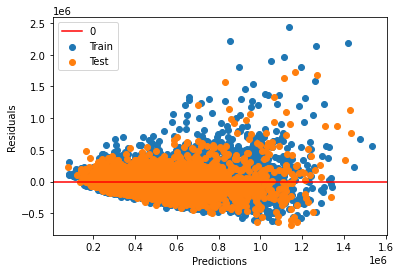

(array([759664.89755465, 576112.80386273, 869682.4109397 , ...,
        253510.24896005, 536793.44838617, 341112.21078553]),
 array([727129.8403096 , 377892.33418663, 784256.25736244, ...,
        443323.05294812, 480963.0109898 , 919495.8815022 ]),
 array([-154304.57825472, -207515.41506322, -145515.85076082,
         -57473.05946943,   92517.74514331,   37913.85978038,
          27782.86597043,  -87539.04549724,  -19549.67805373]))

In [54]:
x_test_enc = fct.transform(x_test)
x_test_scaled = fscaler.transform(x_test_enc)
evaluate_model(x_train_scaled,x_test_scaled,y_train,y_test)

As mentioned above, this model is accounting for 56.6% of the variance in price, with a mean error of 116 thousand dollars. This model can give us predictions to use for our predictor tool.

The predictor tool should take in information about a house, but if a piece of information is unavailable, it should use a measure of central tendency, so let's define those measures.

In [55]:
mean_living= x_train['sqft_living'].mean()
median_floors = x_train['floors'].median()
mean_basement = x_train['sqft_basement'].mean()
median_yr = x_train['yr_built'].median()
median_bedrooms = x_train['bedrooms'].median()
mode_grade = x_train['grade'].mode().values[0]
central_tendency = [mean_living,median_floors,mean_basement,median_yr,median_bedrooms]

The predictor function takes in a transformer, a scaler, and a regression model; as well as the information about the house.

In [56]:
def predict_price(fitted_ct,
                  fitted_scaler,
                  fitted_lr,
                  sqft_living = mean_living,
                  floors = median_floors,
                  sqft_basement = mean_basement,
                  yr_built = median_yr,
                  bedrooms = median_bedrooms,
                  grade = mode_grade
                 ):
    '''
    Takes in information about a house and uses the linear regression model, column transformer, and scaler passed to it
    to predict the value of a house matching the values passed in.
    If a value is not passed to the function it will use a measure of central tendency depending on the column.
    '''
    
    # create a single row dataframe to test the model on and get the price prediction
    test_df = pd.DataFrame({'sqft_living': [sqft_living],
                            'floors': [floors],
                            'sqft_basement': sqft_basement,
                            'yr_built':yr_built,
                            'bedrooms': [bedrooms],
                            'grade': [grade]
                           })
    display(test_df)
    
    # encode categorical values
    test_df_enc = fitted_ct.transform(test_df)
    
    # scale data
    test_df_scaled = fitted_scaler.transform(test_df_enc)
    
    # run the linear regression and return the prediction
    prediction = fitted_lr.predict(test_df_scaled)
    
    print(F"\nPredicted price of this house:\t{int(prediction[0])}.")
    return

The take inputs function helps the predictor function by letting the user input information directly and returning a list which can be unpacked and passed to the predictor function.

In [57]:
def take_inputs():
    '''
    Takes user input information about a house and returns a list containing all of that information.
    Checks that all except grade are numeric inputs; if false, uses measure of central tendency instead.
    For grade, checks that the string input matches to one of the grades in our training data;
    If false, uses most common grade.
    '''
    
    living_val = input("Enter the square foot living area of the house:\t")
    floors_val = input("Enter the number of floors the house has:\t")
    basement_val = input("Enter the square foot basement area of the house:\t")
    yr_val = input("Enter the year the house was built:\t")
    bedrooms_val = input("Enter the number of bedrooms in the house:\t")
    grade_val = str(input("Enter the grade of the house:\t"))
    
    feature_list = [living_val,floors_val,basement_val,yr_val,bedrooms_val]
    count = 0
    for feature in feature_list:
        if feature == '':
            feature_list[count] = float(central_tendency[count])
        count += 1
        
    for unique_grade in [*x_train['grade'].value_counts().index]:
        if str(grade_val) in unique_grade:
            print(f"Grade read as:\t{unique_grade}")
            grade_val = unique_grade
    if grade_val not in [*x_train['grade'].value_counts().index]:
        grade_val = mode_grade
        print(f"Value not in model, using {grade_val} in place.")
    return [*feature_list,grade_val]

And so to use the predictor function, I've defined a list that will be unpacked and passed to the predictor function. The list contains the transformer, scaler, linear regression model, and the user input, and then the function outputs the data that was input so the user can see that it was read in properly, and then prints the predicted price.

Line commented out: Runs prediction with user input.

Line running currently: Runs using average values.

In [58]:
# predict_price(fct,fscaler,flr,*take_inputs())
predict_price(fct,fscaler,flr)

,sqft_living,floors,sqft_basement,yr_built,bedrooms,grade
0,2005.744997,1.5,276.069184,1976.0,3.0,7 Average



Predicted price of this house:	419465.


## Conclusions
We've made a tool to allow the user to predict the price of a home, and determined some of the more important features determining the price to be living area and grade.

We'd suggest using the predictor function and referring to our mean absolute error of 116 thousand dollars to determine whether the difference between the predicted and actual price is low enough that you aren't being overcharged.

We also suggest keeping the limitations of our model in mind.

## Next Steps
If given more time to work on this project, we would work to make a more accurate model, and we have a start that looks rather promising.

### New Kitchen Sink Model
This model violates the assumptions of linear regression, but is showing more accuracy than our previous model. This model would need to be further refined before it could be trusted, but further exploration could be worthwhile.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19389 entries, 2495 to 15937
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19389 non-null  int64         
 1   date           19389 non-null  datetime64[ns]
 2   price          19389 non-null  float64       
 3   bedrooms       19389 non-null  int64         
 4   bathrooms      19389 non-null  float64       
 5   sqft_living    19389 non-null  int64         
 6   sqft_lot       19389 non-null  int64         
 7   floors         19389 non-null  float64       
 8   condition      19389 non-null  object        
 9   grade          19389 non-null  object        
 10  sqft_above     19389 non-null  int64         
 11  sqft_basement  19389 non-null  float64       
 12  yr_built       19389 non-null  int64         
 13  zipcode        19389 non-null  int64         
 14  lat            19389 non-null  float64       
 15  long           1

In [60]:
filtered_x = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above',
             'sqft_basement','yr_built','zipcode','lat','long','sqft_living15','sqft_lot15']]
filtered_x_train, filtered_x_test, filtered_y_train, filtered_y_test = train_test_split(filtered_x, filtered_y,
                                                                                test_size=0.25, random_state = 23)

In [61]:
cat_cols = ['grade','condition']
encoder = OneHotEncoder(handle_unknown='error',drop='first',categories='auto')
ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],remainder='passthrough',sparse_threshold=0)
ct.fit(filtered_x_train)
filtered_x_train = ct.transform(filtered_x_train)
filtered_x_test = ct.transform(filtered_x_test)

In [62]:
scaler = StandardScaler()
scaler.fit(filtered_x_train)
scaled_x_train = scaler.transform(filtered_x_train)
scaled_x_test = scaler.transform(filtered_x_test)



Train R2 Score: 0.6561
Train MAE Score: $98446.4299
Train RMSE Score: $149766.7456
********************
Test R2 Score: 0.6634
Test MAE Score: $99224.4589
Test RMSE Score: $147762.7017
********************


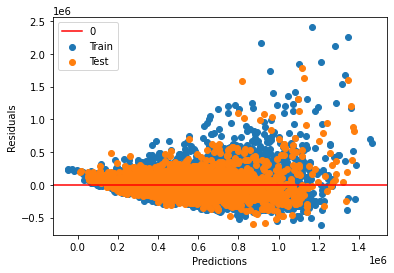

{'ohe__x0_6 Low Average': -118818.22889861684,
 'ohe__x0_7 Average': -169164.54412437635,
 'ohe__x0_8 Good': -123475.24536233791,
 'ohe__x0_9 Better': -50504.653173176484,
 'ohe__x1_Fair': -1661.3559085348134,
 'ohe__x1_Good': 10045.59890034979,
 'ohe__x1_Poor': -3633.5670389749303,
 'ohe__x1_Very Good': 15109.649229468048,
 'bedrooms': -18588.8711632493,
 'bathrooms': 30576.614018806926,
 'sqft_living': 44173.99158113166,
 'sqft_lot': 10871.322065797875,
 'floors': 22004.16739306438,
 'sqft_above': 30680.229299954262,
 'sqft_basement': 29787.65357776362,
 'yr_built': -66553.74495564349,
 'zipcode': -4710.036420176482,
 'lat': 75627.18309138289,
 'long': -11200.53553743978,
 'sqft_living15': 25212.33271403506,
 'sqft_lot15': -6093.80917890759}

In [63]:
dict(zip(ct.get_feature_names(), evaluate_model(scaled_x_train,scaled_x_test,filtered_y_train,filtered_y_test)[2]))